In [191]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage import filters

['01_dr', '02_dr', '03_dr', '04_dr', '05_dr', '06_dr', '07_dr', '08_dr', '09_dr', '10_dr', '11_dr', '12_dr', '13_dr', '14_dr', '01_h', '02_h', '03_h', '04_h', '05_h', '06_h', '07_h', '08_h', '09_h', '10_h', '11_h', '12_h', '13_h', '14_h', '01_g', '02_g', '03_g', '04_g', '05_g', '06_g', '07_g', '08_g', '09_g', '10_g', '11_g', '12_g', '13_g', '14_g']


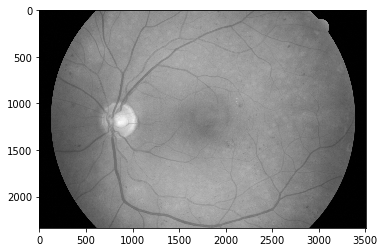

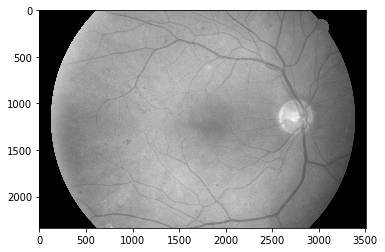

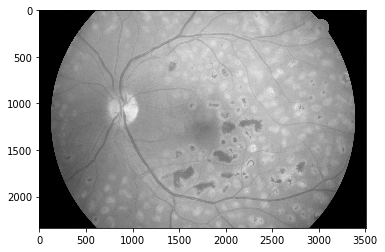

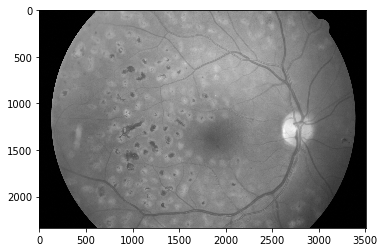

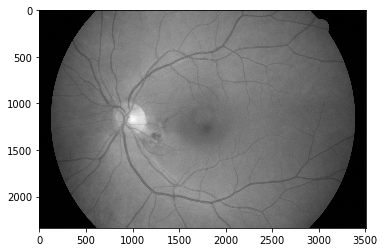

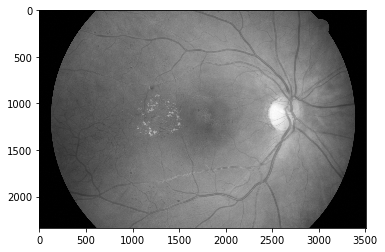

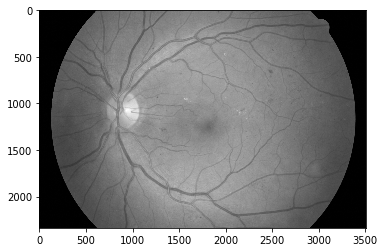

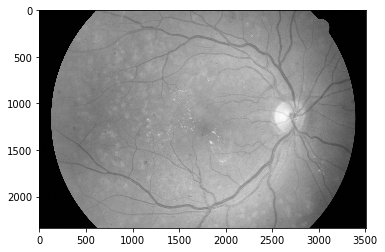

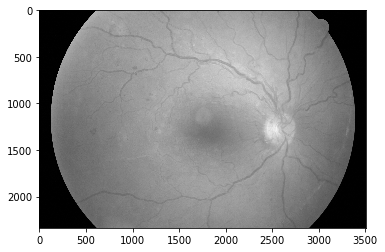

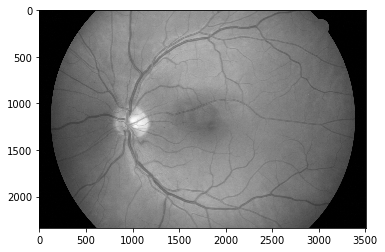

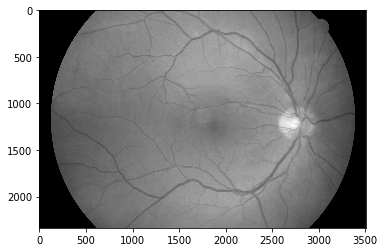

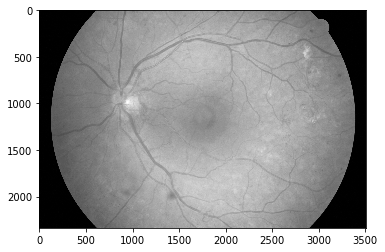

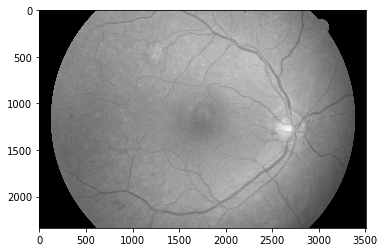

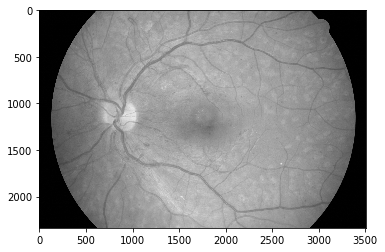

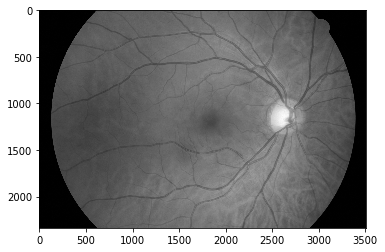

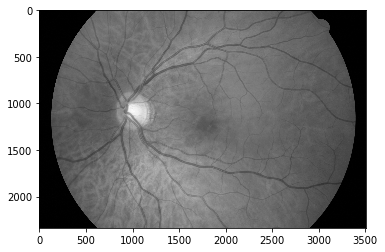

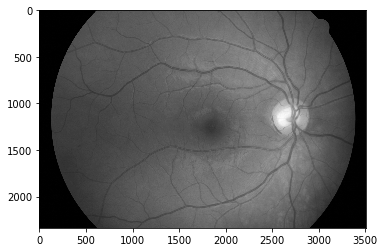

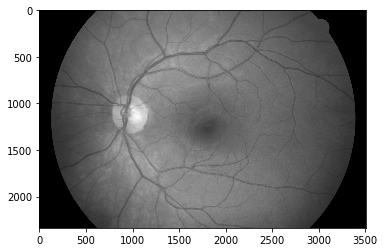

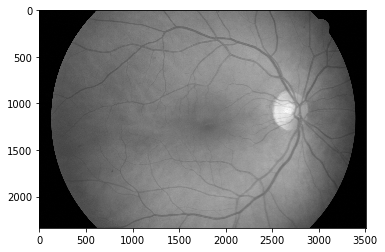

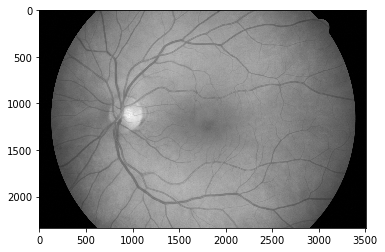

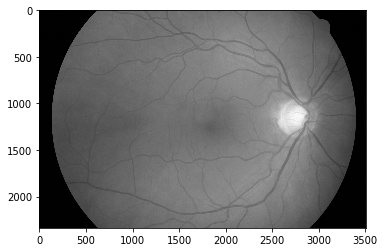

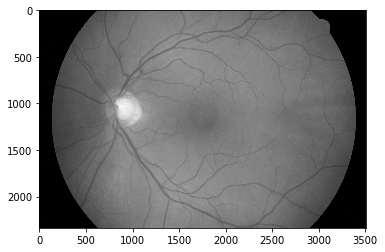

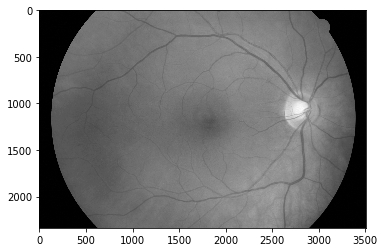

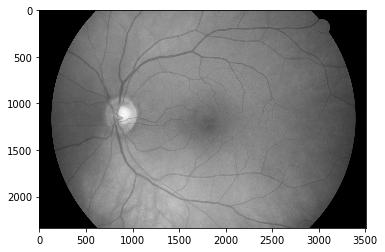

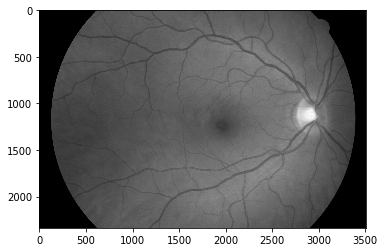

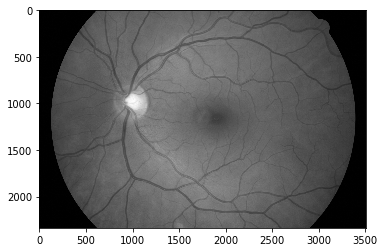

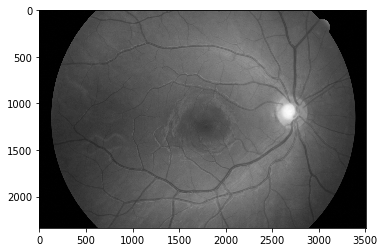

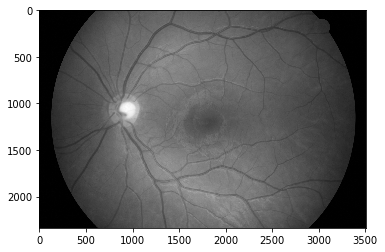

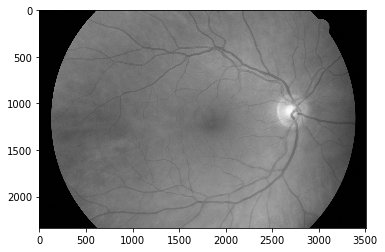

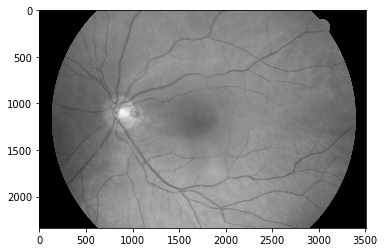

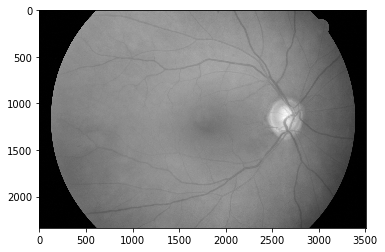

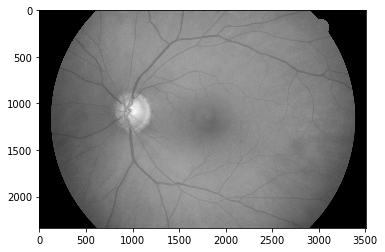

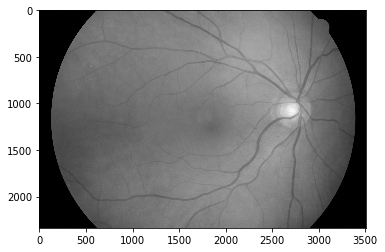

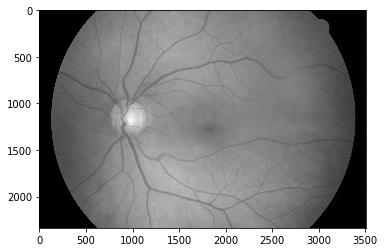

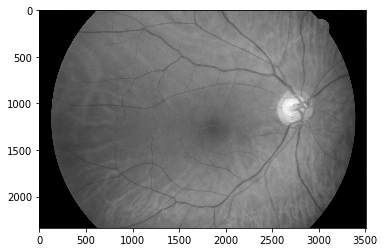

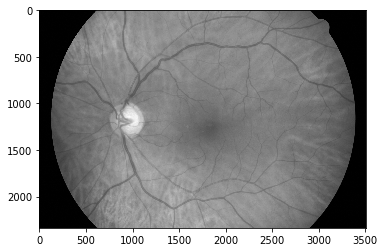

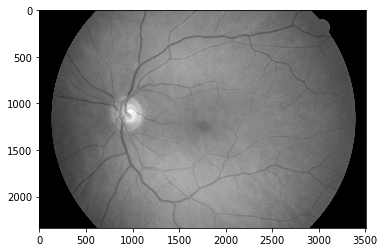

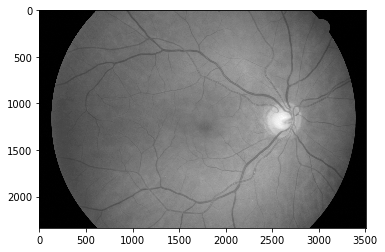

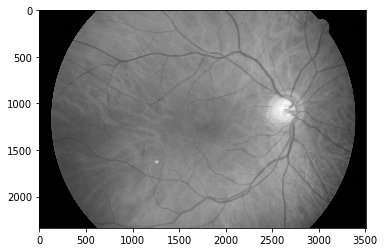

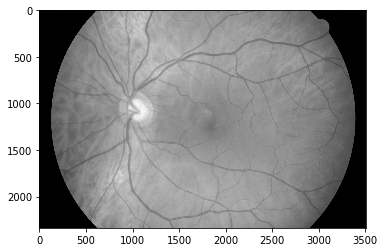

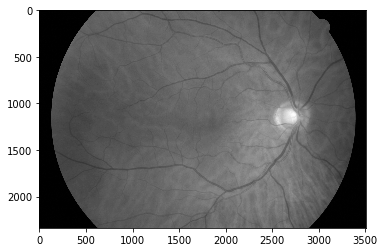

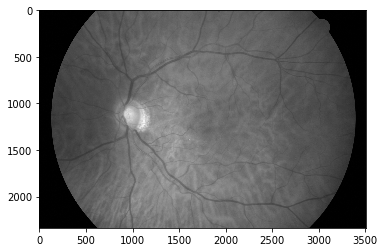

In [2]:
dt=[('0' if x<10 else '')+str(x) for x in range(1, 15)]
dy=[[y+'_'+x for y in dt] for x in ['dr', 'h', 'g']]
z=[]
for x in dy:
    z=z+x
print(z)

flag=cv2.IMREAD_GRAYSCALE
#flag=cv2.IMREAD_COLOR
Manuals = [cv2.imread(f"manual1/{x}.tif", flag) for x in z]
Masks= [cv2.imread(f"mask/{x}_mask.tif", flag) for x in z]
Images= [cv2.imread(f"images/{x}.jpg", flag) for x in z]

Creation=list(zip(Manuals, Masks, Images))

for x in Images:
    #plt.imshow(cv2.cvtColor(x, cv2.COLOR_BGR2RGB))
    plt.imshow(x, cmap='gray')
    plt.show()

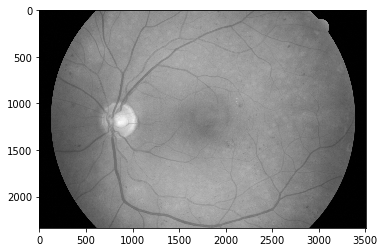

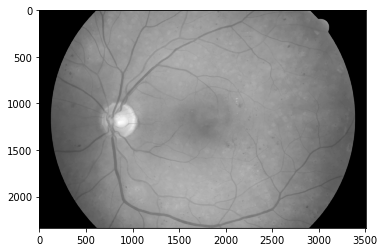

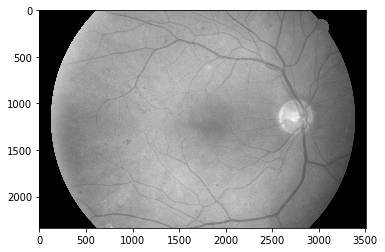

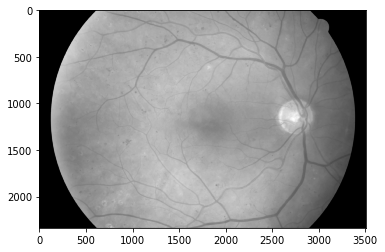

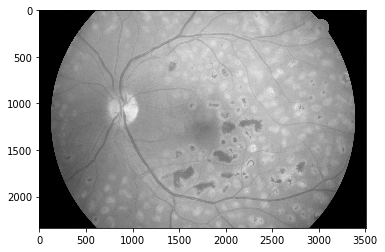

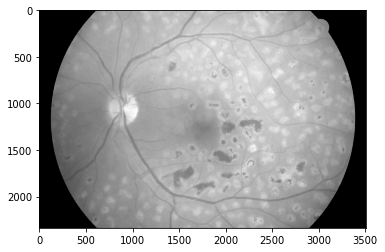

In [121]:
#uint8

blurk=np.asarray([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9
blurk2=np.asarray([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]])/256

res=[]
#kernel=np.asarray([[1, 0, -1], [0, 0, 0], [-1, 0, 1]])
#kernel=np.asarray([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
for x in Creation[:3]:
    sv=x[2]
    
    #####  NORMALIZACJA  #####
    mx, mn=max(sv[sv>-1]), min(sv[sv>-1])
    sv=(sv-mn)/(mx-mn)
    sv=np.multiply(sv, x[1]/255)
    sv=np.asarray(sv*255, dtype='uint8')
    
    #####  DENOISING  #####
    raka=sv
    raka=np.asarray(raka, dtype='uint8')
    raka=cv2.fastNlMeansDenoising(raka)
    
    #####  BLURRING  #####
    dt=np.absolute(signal.convolve2d(raka, blurk2, mode='same'))
    dt[dt>255]=255
    for i in range(10): 
        dt=np.absolute(signal.convolve2d(dt, blurk2, mode='same'))
        dt[dt>255]=255

    """
    dt=np.absolute(signal.convolve2d(dt, edgek, mode='same'))
    dt[dt>255]=255
    Thr=2
    dt[dt>Thr]=255
    dt[dt<=Thr]=0
    """
    
    
    
    
    #dt=cv2.Canny(sv, 40, 60)
    #dt=np.reshape()
    #dt=cv2.adaptiveThreshold(dt,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11,2)
    #dt=np.multiply(dt, x[1])
    res.append(dt)
    plt.imshow(x[2], cmap='gray')
    plt.show()
    plt.imshow(dt, cmap='gray')
    plt.show()

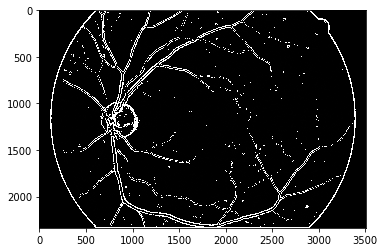

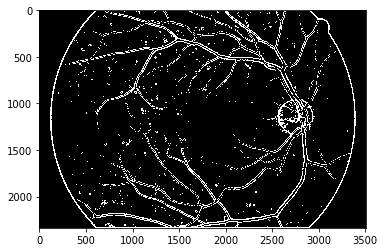

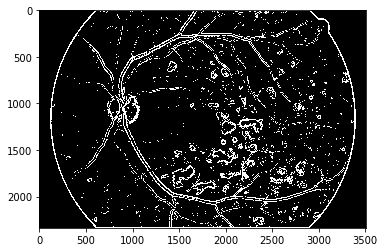

In [204]:
edgek0=np.asarray([[-1, 0, 1], [0, 0, 0], [1, 0, -1]])
edgek1=np.asarray([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
edgek1=-1*np.asarray([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
edgek2=np.asarray([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

for x in res:
    x=np.asarray(x, dtype="uint8")
    kx=filters.roberts(x)
    kx[kx>0.005]=1
    
    """
    dt=np.absolute(signal.convolve2d(x, edgek1, mode='same'))
    dt[dt>255]=255
    for i in range(3):
        dt=np.absolute(signal.convolve2d(dt, edgek1, mode='same'))
        dt[dt>255]=255
    dt=np.asarray(dt, dtype='uint8')
    """
    #kx=cv2.adaptiveThreshold(dt,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,7)
    #print(kx)
    #_=[print(x, len(kx[kx==x])) for x in range(256)]
    
    plt.imshow(kx, cmap='gray')
    plt.show() 